# Problem Set 2, Sm-Nd: $\varepsilon$ Nd plots and model ages

## Objectives: 1) understand how to calculate $\varepsilon$ Nd and construct $\varepsilon$ Nd plots; 2) gain more experience with some matplotlib functions; and 3) interpret results in the context of long-term crustal evolution

## Problem 1 

### Frost (1993) reported the following data for high-grade schists from the Wind River Range, in Wyoming. For each sample, calculate a) $^{147}Sm/^{144}Nd$, b) the depleted mantle model age ($T_{DM}$), and c) the $\varepsilon(T_{DM})_{Nd}$. The age of _deposition_ of these rocks is 2.6 Ga. Based on the model ages, what can you interpret about their sources?

|Sample|$^{143}Nd/^{144}Nd$|Sm (ppm)|Nd (ppm)|
|-----|--------|--------|---------|
|WP_1|0.510945|1.877|10.11|
|FPN81_3|0.51094|8.541|44.86|
|FPN81_11b|0.511332|5.310|25.34|
|DM83_28|0.51095|9.375|49.69|
|4CF_8|0.510765|3.161|17.79|
|4CF_37|0.511094|9.283|52.17|
|4CF_53|0.510961|6.802|35.40|
|AR_7a|0.511285|4.690|24.20|

Let's get our useful libraries imported:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

and now setup our data frame:

In [2]:
data = {'Nd143_Nd144' : [0.510945, 0.51094, 0.511332, 0.51095, 0.510765, 0.511094, 0.510961, 0.511285], 
        'Sm_ppm' : [1.877, 8.541, 5.310, 9.375, 3.161, 9.283, 6.802, 4.690], 
        'Nd_ppm' : [10.11, 44.86, 25.34, 49.69, 17.79, 52.17, 35.40, 24.20]}

#We need to define the column order if we want the DataFrame to order our columns in a particular fashion, we also
#need to include the index to complete our DataFrame
Frost_frame = pd.DataFrame(data, columns = ['Nd143_Nd144', 'Sm_ppm', 'Nd_ppm'], index = 
                        ['WP_1', 'FPN81_3', 'FPN81_11b', 'DM83_28', '4CF_8', '4CF_37', '4CF_53', 'AR_7a'])

#let's see what we created
print(Frost_frame)

           Nd143_Nd144  Sm_ppm  Nd_ppm
WP_1          0.510945   1.877   10.11
FPN81_3       0.510940   8.541   44.86
FPN81_11b     0.511332   5.310   25.34
DM83_28       0.510950   9.375   49.69
4CF_8         0.510765   3.161   17.79
4CF_37        0.511094   9.283   52.17
4CF_53        0.510961   6.802   35.40
AR_7a         0.511285   4.690   24.20


Introduce some constants that we'll need throughout this notebook:

In [3]:
Sm_atomic_mass = 150.36 #g/mol
Ab_Sm147 = 0.1499

Nd142_atomic_mass = 141.90772 #g/mol
Nd143_atomic_mass = 142.90981 #g/mol
Nd144_atomic_mass = 143.91009 #g/mol
Nd145_atomic_mass = 144.91257 #g/mol
Nd146_atomic_mass = 145.91311 #g/mol
Nd148_atomic_mass = 147.91689 #g/mol
Nd150_atomic_mass = 149.92089 #g/mol

Ab_Nd142 = 0.27168
Ab_Nd144 = 0.23794
Ab_Nd145 = 0.08290
Ab_Nd146 = 0.17177
Ab_Nd148 = 0.05748
Ab_Nd150 = 0.05626

lambda_147 = 6.54e-12 #1/yr

Nd143_Nd144_DM = 0.513114
Nd143_Nd144_CHUR = 0.512638
Sm147_Nd144_DM = 0.2137
Sm147_Nd144_CHUR = 0.1967

Okay, now we're ready to begin. Let's tackle part a) first. We can use an identical setup here to the one we used in the first problem set. Let's get the moles of $^{147}Sm$:

In [4]:
#an empty list that we'll append to

Sm147_mol = []

#for loop that does the unit conversion to Rb87 for each phase in our DataFrame
#notice that you can call the column in the data frame by its header title

for val_Sm in Frost_frame.Sm_ppm:
    
    mol147 = val_Sm * (1/1000000) * (1/Sm_atomic_mass) * Ab_Sm147
    
    Sm147_mol.append(mol147)

#add it to the DataFrame
Frost_frame['Sm147_mol'] = Sm147_mol

#let's see what we created
print(Frost_frame)

           Nd143_Nd144  Sm_ppm  Nd_ppm     Sm147_mol
WP_1          0.510945   1.877   10.11  1.871258e-09
FPN81_3       0.510940   8.541   44.86  8.514870e-09
FPN81_11b     0.511332   5.310   25.34  5.293755e-09
DM83_28       0.510950   9.375   49.69  9.346319e-09
4CF_8         0.510765   3.161   17.79  3.151329e-09
4CF_37        0.511094   9.283   52.17  9.254600e-09
4CF_53        0.510961   6.802   35.40  6.781190e-09
AR_7a         0.511285   4.690   24.20  4.675652e-09


Now get the moles of $^{144}Nd$ and calculate $^{147}Sm/^{144}Nd$.

In [5]:
#an empty list that we'll append to
Nd144_mol = []

#for loop that does the conversion to Nd144 for each phase in our DataFrame

for i in range(len(Frost_frame)):
    #your math goes here
    #here are some useful hints, be sure to uncomment them  
    
    Ab_Nd144_sample = (1 + Frost_frame.Nd143_Nd144[i] + (Ab_Nd142/Ab_Nd144) + (Ab_Nd145/Ab_Nd144) + (Ab_Nd146/Ab_Nd144) + (Ab_Nd148/Ab_Nd144) + (Ab_Nd150/Ab_Nd144))**-1
    Ab_Nd142_sample = Ab_Nd144_sample * (Ab_Nd142/Ab_Nd144)
    Ab_Nd143_sample = Ab_Nd144_sample * Frost_frame.Nd143_Nd144[i]
    Ab_Nd145_sample = Ab_Nd144_sample * (Ab_Nd145/Ab_Nd144)
    Ab_Nd146_sample = Ab_Nd144_sample * (Ab_Nd146/Ab_Nd144)
    Ab_Nd148_sample = Ab_Nd144_sample * (Ab_Nd148/Ab_Nd144)
    Ab_Nd150_sample = Ab_Nd144_sample * (Ab_Nd150/Ab_Nd144)
    
    Nd_atomic_mass = Ab_Nd142_sample * Nd142_atomic_mass + Ab_Nd143_sample * Nd143_atomic_mass + Ab_Nd144_sample * Nd144_atomic_mass + Ab_Nd145_sample * Nd145_atomic_mass + Ab_Nd146_sample * Nd146_atomic_mass + Ab_Nd148_sample * Nd148_atomic_mass + Ab_Nd150_sample * Nd150_atomic_mass
    mol144 = Frost_frame.Nd_ppm[i] * (1/1000000) * (1/Nd_atomic_mass) * Ab_Nd144_sample
    
    Nd144_mol.append(mol144)
    
#add it to the DataFrame

#try it yourself here!
Frost_frame['Nd144_mol'] = Nd144_mol

#add 147Sm/144Nd to the DataFrame

Sm147_Nd144 = []

for i in range(len(Frost_frame)):
    #try it yourself here!
    ratio147_144 = Frost_frame.Sm147_mol[i]/Frost_frame.Nd144_mol[i]
    
    Sm147_Nd144.append(ratio147_144)

Frost_frame['Sm147_Nd144'] = Sm147_Nd144
    
#let's see what we created
print(Frost_frame)

           Nd143_Nd144  Sm_ppm  Nd_ppm     Sm147_mol     Nd144_mol  \
WP_1          0.510945   1.877   10.11  1.871258e-09  1.668415e-08   
FPN81_3       0.510940   8.541   44.86  8.514870e-09  7.403084e-08   
FPN81_11b     0.511332   5.310   25.34  5.293755e-09  4.181382e-08   
DM83_28       0.510950   9.375   49.69  9.346319e-09  8.200142e-08   
4CF_8         0.510765   3.161   17.79  3.151329e-09  2.935941e-08   
4CF_37        0.511094   9.283   52.17  9.254600e-09  8.609114e-08   
4CF_53        0.510961   6.802   35.40  6.781190e-09  5.841905e-08   
AR_7a         0.511285   4.690   24.20  4.675652e-09  3.993314e-08   

           Sm147_Nd144  
WP_1          0.112158  
FPN81_3       0.115018  
FPN81_11b     0.126603  
DM83_28       0.113978  
4CF_8         0.107336  
4CF_37        0.107498  
4CF_53        0.116078  
AR_7a         0.117087  


Now for part b). Let's create another column to our data from for the $T_{DM}$. We'll use the following equation:

$T_{DM} = \frac{1}{\lambda_{147}}\ln{\big[\frac{(\frac{^{143}Nd}{^{144}Nd})_{sample} - (\frac{^{143}Nd}{^{144}Nd})_{DM}}{(\frac{^{147}Sm}{^{144}Nd})_{sample} - (\frac{^{147}Sm}{^{144}Nd})_{DM}}+ 1\big]}$

where DM correspond to "depleted mantle".

In [6]:
#an empty list that we'll append to
T_DM = []

for i in range(len(Frost_frame)):
    
    #in years
    
    T = (1/lambda_147) * np.log((Frost_frame.Nd143_Nd144[i] - Nd143_Nd144_DM)/(Frost_frame.Sm147_Nd144[i] - Sm147_Nd144_DM) + 1) 
    
    T_DM.append(T)

#add it to the data frame
Frost_frame['T_DM'] = T_DM

#let's see what we created
print(Frost_frame)

           Nd143_Nd144  Sm_ppm  Nd_ppm     Sm147_mol     Nd144_mol  \
WP_1          0.510945   1.877   10.11  1.871258e-09  1.668415e-08   
FPN81_3       0.510940   8.541   44.86  8.514870e-09  7.403084e-08   
FPN81_11b     0.511332   5.310   25.34  5.293755e-09  4.181382e-08   
DM83_28       0.510950   9.375   49.69  9.346319e-09  8.200142e-08   
4CF_8         0.510765   3.161   17.79  3.151329e-09  2.935941e-08   
4CF_37        0.511094   9.283   52.17  9.254600e-09  8.609114e-08   
4CF_53        0.510961   6.802   35.40  6.781190e-09  5.841905e-08   
AR_7a         0.511285   4.690   24.20  4.675652e-09  3.993314e-08   

           Sm147_Nd144          T_DM  
WP_1          0.112158  3.231749e+09  
FPN81_3       0.115018  3.331984e+09  
FPN81_11b     0.126603  3.096858e+09  
DM83_28       0.113978  3.282588e+09  
4CF_8         0.107336  3.340102e+09  
4CF_37        0.107498  2.880991e+09  
4CF_53        0.116078  3.335606e+09  
AR_7a         0.117087  2.867620e+09  


And finally, part c). Let's add another column to the data frame for $\varepsilon(T_{DM})_{Nd}$. Think carefully through what we're trying to do here. We want to calculate $\varepsilon$ Nd _at the $T_{DM}$ age of each sample_. To accomplish this, you'll need to manipulate the age equation for the Sm-Nd system:

$\frac{^{143}Nd}{^{144}Nd} = (\frac{^{143}Nd}{^{144}Nd})_{i} + \frac{^{147}Sm}{^{144}Nd}(e^{\lambda_{147}t} - 1)$

and solve for both the $\frac{^{143}Nd}{^{144}Nd}$ of the sample and CHUR at a specific time. You'll need to use the math.exp() function to raise something to the exponential (note that we imported the math library back up at the top of this notebook).

In [7]:
#an empty list that we'll append to
EpT_DM = []

for i in range(len(Frost_frame)):
    
    Nd143_Nd144_0 = Frost_frame.Nd143_Nd144[i] - Frost_frame.Sm147_Nd144[i] * (math.exp(Frost_frame.T_DM[i]*lambda_147) - 1)
    Nd143_Nd144_T_chur = Nd143_Nd144_CHUR - Sm147_Nd144_CHUR * (math.exp(Frost_frame.T_DM[i]*lambda_147) - 1)
    EpT = ((Nd143_Nd144_0/Nd143_Nd144_T_chur) - 1) * 10000
    
    EpT_DM.append(EpT)

#add it to the data frame
Frost_frame['EpT_DM'] = EpT_DM

#let's see what we created
print(Frost_frame)

           Nd143_Nd144  Sm_ppm  Nd_ppm     Sm147_mol     Nd144_mol  \
WP_1          0.510945   1.877   10.11  1.871258e-09  1.668415e-08   
FPN81_3       0.510940   8.541   44.86  8.514870e-09  7.403084e-08   
FPN81_11b     0.511332   5.310   25.34  5.293755e-09  4.181382e-08   
DM83_28       0.510950   9.375   49.69  9.346319e-09  8.200142e-08   
4CF_8         0.510765   3.161   17.79  3.151329e-09  2.935941e-08   
4CF_37        0.511094   9.283   52.17  9.254600e-09  8.609114e-08   
4CF_53        0.510961   6.802   35.40  6.781190e-09  5.841905e-08   
AR_7a         0.511285   4.690   24.20  4.675652e-09  3.993314e-08   

           Sm147_Nd144          T_DM    EpT_DM  
WP_1          0.112158  3.231749e+09  2.219946  
FPN81_3       0.115018  3.331984e+09  1.996526  
FPN81_11b     0.126603  3.096858e+09  2.520203  
DM83_28       0.113978  3.282588e+09  2.106660  
4CF_8         0.107336  3.340102e+09  1.978419  
4CF_37        0.107498  2.880991e+09  2.999721  
4CF_53        0.116078  3.

Finally, answer the question below: Given the model ages, what can you say about the sources for these schists?

## Problem 2

### Bowring and Housh (1995) measured Nd isotope data from whole rocks, and high-precision U/Pb ages from zircons in the same whole rocks, in samples from the Acasta gneiss in northwestern Canada. The data are given below:

|Sample|U/Pb age (Ga)|Nd (ppm)|Sm (ppm)|$^{147}Sm/^{144}Nd$|$^{143}Nd/^{144}Nd$|
|-----|-----|--------|--------|---------|---------|
|1|4.00|37.58|5.28|0.08487|0.509854|
|2|4.00|16.15|4.23|0.1583|0.511376|
|3|3.94|15.99|1.94|0.07325|0.509598|
|4|3.74|34.41|5.64|0.09903|0.510108|
|5|3.72|18.57|3.07|0.09982|0.510217|
|6|3.60|5.23|1.26|0.14519|0.511189|
|7|3.60|11.2|2.02|0.10945|0.51061|
|8|3.60|91.36|12.2|0.08086|0.509746|
|9|3.60|50.59|9.38|0.11214|0.51042|
|10|3.60|5.72|1.07|0.11267|0.510767|

### Part a. Calculate $\varepsilon(0)_{Nd}$ (i.e. present day) and $\varepsilon(T)_{Nd}$ (i.e. at the U/Pb age) for each sample, and plot both versus time, from 4.56 Ga to the present. (Hint: first calculate $^{143}Nd/^{144}Nd$ at the U/Pb age, then normalize that to the $^{143}Nd/^{144}Nd$ of CHUR at that age). Also plot $\varepsilon(T)_{Nd}$ trends for depleted mantle on the same plot, assuming both DePaolo’s original $\varepsilon(T)_{Nd} = 0.25T^2 – 3T + 8.5$, and a linear model with $\varepsilon(T)_{Nd} = 8.6 - 1.9T$.

First, let's create a data frame for these data. The error on the $^{143}Nd/^{144}Nd$ values as reported by Bowring and Housh (1995) is 0.000010 for all samples. The error on $^{147}Sm/^{144}Nd$ is 0.2%

In [8]:
data = {'U_Pb' : [4.00, 4.00, 3.94, 3.74, 3.72, 3.60, 3.60, 3.60, 3.60, 3.60],
        'Nd_ppm' : [37.58, 16.15, 15.99, 34.41, 18.57, 5.23, 11.2, 91.36, 50.59, 5.72],
        'Sm_ppm' : [5.28, 4.23, 1.94, 5.64, 3.07, 1.26, 2.02, 12.2, 9.38, 1.07],
        'Sm147_Nd144' : [0.08487, 0.1583, 0.07325, 0.09903, 0.09982, 0.14519, 0.10945, 0.08086, 0.11214, 0.11267], 
        'Nd143_Nd144' : [0.509854, 0.511376, 0.509598, 0.510108, 0.510217, 0.511189, 0.51061, 0.509746, 0.51042, 0.510767],
        'Nd143_Nd144_sigma' : [0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010]}

#We need to define the column order if we want the DataFrame to order our columns in a particular fashion, we also
#need to include the index to complete our DataFrame
BH_frame = pd.DataFrame(data, columns = ['U_Pb', 'Nd_ppm', 'Sm_ppm', 'Sm147_Nd144', 'Nd143_Nd144', 'Nd143_Nd144_sigma'], index = 
                        ['SAB91_37', 'SAB91_38', 'SAB89_39', 'SAB89_38', 'SAB90_71', 'BGXM_GT', 'SAB89_18', 'SAB89_21', 'SAB91_10', 'SAB91_5'])

#create the error column and add it to the data frame
BH_frame.insert(4, 'Sm147_Nd144_sigma', BH_frame.Sm147_Nd144 * 0.002)

#let's see what we created
print(BH_frame)

          U_Pb  Nd_ppm  Sm_ppm  Sm147_Nd144  Sm147_Nd144_sigma  Nd143_Nd144  \
SAB91_37  4.00   37.58    5.28      0.08487           0.000170     0.509854   
SAB91_38  4.00   16.15    4.23      0.15830           0.000317     0.511376   
SAB89_39  3.94   15.99    1.94      0.07325           0.000146     0.509598   
SAB89_38  3.74   34.41    5.64      0.09903           0.000198     0.510108   
SAB90_71  3.72   18.57    3.07      0.09982           0.000200     0.510217   
BGXM_GT   3.60    5.23    1.26      0.14519           0.000290     0.511189   
SAB89_18  3.60   11.20    2.02      0.10945           0.000219     0.510610   
SAB89_21  3.60   91.36   12.20      0.08086           0.000162     0.509746   
SAB91_10  3.60   50.59    9.38      0.11214           0.000224     0.510420   
SAB91_5   3.60    5.72    1.07      0.11267           0.000225     0.510767   

          Nd143_Nd144_sigma  
SAB91_37            0.00001  
SAB91_38            0.00001  
SAB89_39            0.00001  
SAB89_38  

Now we can calculate $\varepsilon$(0)$_{Nd}$ (i.e. present day) and $\varepsilon$(T)$_{Nd}$ (i.e. at the U/Pb age). By mindful of your units! 

(We could do this in one for loop, but for ease of reading and following along, we'll break it into two. Note that if you're working with really big data sets, then it's best to minimize the number of for loops you have in your code so that it runs more efficiently.)

In [9]:
#an empty list that we'll append to
Ep_0 = []

for val143_144 in BH_frame.Nd143_Nd144:
    
    EpT = ((val143_144/Nd143_Nd144_CHUR) - 1) * 10000
    
    Ep_0.append(EpT)

#add it to the data frame
BH_frame['Ep_0'] = Ep_0

#another empty list that we'll append to
Ep_U_Pb = []

for i in range(len(BH_frame)):
    
    T_sam = BH_frame.Nd143_Nd144[i] - BH_frame.Sm147_Nd144[i] * (math.exp(BH_frame.U_Pb[i]*1e9*lambda_147) - 1)
    Nd143_Nd144_T_chur = Nd143_Nd144_CHUR - Sm147_Nd144_CHUR * (math.exp(BH_frame.U_Pb[i]*1e9*lambda_147) - 1)
    EpT = ((T_sam/Nd143_Nd144_T_chur) - 1) * 10000
    
    Ep_U_Pb.append(EpT)

#add it to the data frame
BH_frame['Ep_U_Pb'] = Ep_U_Pb

#let's see what we created
print(BH_frame)

          U_Pb  Nd_ppm  Sm_ppm  Sm147_Nd144  Sm147_Nd144_sigma  Nd143_Nd144  \
SAB91_37  4.00   37.58    5.28      0.08487           0.000170     0.509854   
SAB91_38  4.00   16.15    4.23      0.15830           0.000317     0.511376   
SAB89_39  3.94   15.99    1.94      0.07325           0.000146     0.509598   
SAB89_38  3.74   34.41    5.64      0.09903           0.000198     0.510108   
SAB90_71  3.72   18.57    3.07      0.09982           0.000200     0.510217   
BGXM_GT   3.60    5.23    1.26      0.14519           0.000290     0.511189   
SAB89_18  3.60   11.20    2.02      0.10945           0.000219     0.510610   
SAB89_21  3.60   91.36   12.20      0.08086           0.000162     0.509746   
SAB91_10  3.60   50.59    9.38      0.11214           0.000224     0.510420   
SAB91_5   3.60    5.72    1.07      0.11267           0.000225     0.510767   

          Nd143_Nd144_sigma       Ep_0   Ep_U_Pb  
SAB91_37            0.00001 -54.307328  3.548782  
SAB91_38            0.00001 

Let's make the plot. As with the previous problem set, I'll get you started and then you can fill in the crucial bits. 

Plotting up a function is a little bit tricker than just a scatter plot of data. The basic strategy is to create a discretized list of numbers along the x axis (specifically, an array), and then evaluate those x values to get a y value. I'll guide you through this process below. We'll use the function numpy.arange() to create our discrete array of x values. This function takes three arguments: a start value, an end value, and the spacing increment; each of which are separated by commas. 

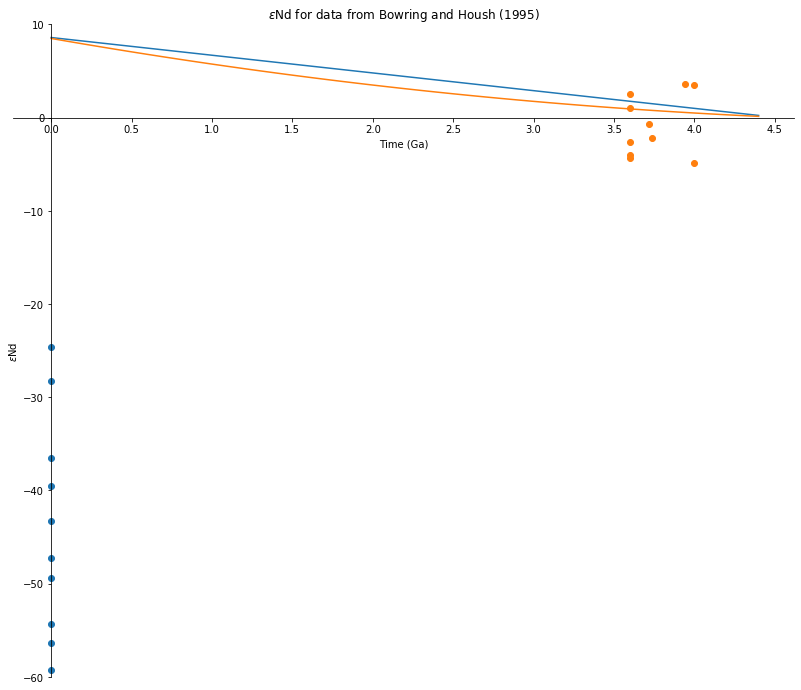

In [10]:
#set up the plot

plt.figure(figsize = (14, 12))
plt.xlabel('Time (Ga)')
plt.ylabel('$\epsilon$Nd')
plt.ylim((-60,10))
#if we want to change the spacing of our ticks, we can also us a numpy array to do it
x_ticks = np.arange(0, 4.56, 0.5)
plt.xticks(x_ticks)

#these bits of code are needed to change where the x axis and y axis intersect each other
#the "spines" here are the two axes (bottom and left) and the bounding box (top and right)
#these bits of code also allow us to make the plot more asethetically pleasing by removing the bounding box
#the .gca() function just let's python know that we want to manipulate the figure as defined in the lines of code above

ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('$\epsilon$Nd for data from Bowring and Housh (1995)')

#plot up these data
#use plt.scatter() and this list of zeros for your "dummy" x values
zeros = [0] * 10
plt.scatter(zeros, BH_frame.Ep_0)
plt.scatter(BH_frame.U_Pb, BH_frame.Ep_U_Pb)

#plot the depleted mantle lines
#use a discretized array of x values to do this
x_vals = np.arange(0, 4.5, 0.1)
y_vals_linear = 8.6 - 1.9 * x_vals
y_vals_depaolo = 0.25 * x_vals**2 - 3 * x_vals + 8.5

plt.plot(x_vals, y_vals_linear)
plt.plot(x_vals, y_vals_depaolo)

plt.show()

### Part b. What is the range of $\varepsilon$(T)$_{Nd}$ for these rocks? Are they consistent with derivation from a depleted mantle reservoir that followed the trends that you plotted? Assuming that these initial isotopic compositions are accurate, what are some potential geologic implications of the highest and lowest $\varepsilon$(T)$_{Nd}$ samples? 

Use the next cell below to write in your answer.

### Part c. Now plot these samples on a Sm/Nd isochron, and calculate an age from it. Why is this age so different from that of the U/Pb ages?

First let's plot the data, we can use a very similar syntax to the one from the previous problem. I'll let you do most of the setup here.

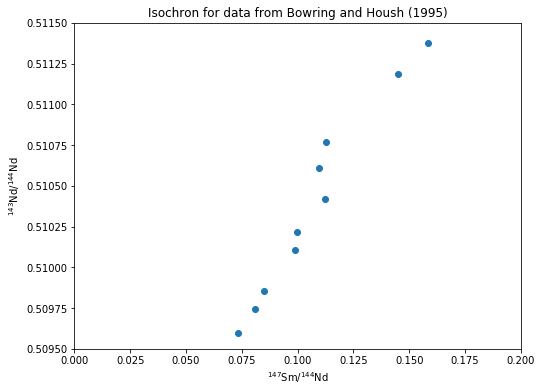

In [11]:
plt.figure(figsize = (8, 6))
plt.xlabel('$^{147}$Sm/$^{144}$Nd')
plt.ylabel('$^{143}$Nd/$^{144}$Nd')
plt.ylim((0.5095, 0.5115))
plt.xlim((0, 0.2))
plt.title('Isochron for data from Bowring and Housh (1995)')

#include the line below that will actually plot up these data
#use plt.scatter()
plt.scatter(BH_frame.Sm147_Nd144, BH_frame.Nd143_Nd144)

plt.show()

For calculating the age, we'll need to get the slope. Here is a good illustration of the power of the function. We have already done this excercise in PS1, so we can simply reuse (copy and paste below) the unweighted linear regression function to get a value for the slope. 

### BONUS: You can also get MSWD for this isochron if you use both the unweighted and weighted linear regression functions. Try this if you're feeling bold!

In [12]:
#paste in your function (or functions) from PS1 below

def ord_lin_regress(X_vals, Y_vals):
    
    #hint: it helps to create arrays for XY values and X^2 (use x**2 to raise something to a power) from your input
    #first create some empty arrays
    
    XY_vals = []
    X2_vals = []
    
    #then try this for loop (remember that Python uses zero indexing):
    
    for i in range(len(X_vals)):
        XY = X_vals[i] * Y_vals[i]
        X2 = X_vals[i]**2
        
        XY_vals.append(XY)
        X2_vals.append(X2)
        
    #now calculate slope and intercept below using the sum function, I'll let you try the math here
    
    slope = (sum(XY_vals)-(sum(X_vals)*sum(Y_vals)/len(X_vals)))/(sum(X2_vals)-(sum(X_vals)**2)/len(X_vals))
    intercept = (sum(X_vals)*sum(XY_vals)-sum(Y_vals)*sum(X2_vals))/(sum(X_vals)**2-len(X_vals)*sum(X2_vals))
    
    return slope, intercept

def weight_lin_regress(X_vals, Y_vals, X_err, Y_err, m_guess, r_in):
    #like your previous function, create some empty lists that are the same length as the function inputs
    
    W_X_vals = []
    W_Y_vals = []
    alpha_vals = []
    r_vals = []
    
    #calculate the W_X and W_Y values for each X,Y input
    for i in range(len(X_err)):
        W_X = 1/(X_err[i]**2)
        W_Y = 1/(Y_err[i]**2)
        alpha = (W_X * W_Y)**(1/2)
        r = r_in[i]
        
        W_X_vals.append(W_X)
        W_Y_vals.append(W_Y)
        alpha_vals.append(alpha)
        r_vals.append(r)
    
    #now we can set up our while loop to iterate
    #a while loop performs a certain set of steps "while" a condition is true
    #in our case we want that condition to be until our guess and the solution approach a set level of precision
    
    #first, intialize the m value, we'll call it the prior
    m_prior = m_guess
    
    #now, enter the loop, and have it repeat itself until we get our calculated value within 0.0001%
    #need to make sure the while loop will execute the first time, so we'll set the evaluation criteria to "true"
    
    exceeds_err = True 
    while exceeds_err:
        #lets setup our empty lists, we'll need to reset them with each pass of the loop because the values will
        #need to be updated for new iterations of the slope
        
        Z_vals = []
        ZX_vals = []
        ZY_vals = []
        
        #now we need a for loop just as with the previous examples to calculate values for each sample
        for i in range(len(X_vals)):
            Z = (W_X_vals[i]*W_Y_vals[i])/(m_prior**2 * W_Y_vals[i] + W_X_vals[i] - 2*m_prior*r_vals[i]*(W_X_vals[i]*W_Y_vals[i])**(1/2))
            ZX = Z * X_vals[i]
            ZY = Z * Y_vals[i]
            
            Z_vals.append(Z)
            ZX_vals.append(ZX)
            ZY_vals.append(ZY)
            
        #now calculate the X_m and Y_m values from your Z, ZX, and ZY lists
        
        X_m = sum(ZX_vals)/sum(Z_vals)
        Y_m = sum(ZY_vals)/sum(Z_vals)

        #then we can move onto the U and the V values using the same process as above, as you see below, we don't
        #actually need the U and V lists for calculating the slope, BUT we do need a list of Z * U^2 for
        #the slope error and intercept error
        
        #if you look closely at the equation for slope, it's a sum of the entire numerator and entire denonimator
        #we'll call the top num_vals and the bottom den_vals
        U_vals = []
        num_vals = []
        den_vals = []
        
        for i in range(len(X_vals)):
            U = X_vals[i] - X_m
            V = Y_vals[i] - Y_m
            U_vals.append(U)
            
            num = Z_vals[i]**2 * V * (U/W_Y_vals[i] + m_prior*V/W_X_vals[i] - r_vals[i]*V/alpha_vals[i])
            den = Z_vals[i]**2 * U * (U/W_Y_vals[i] + m_prior*V/W_X_vals[i] - m_prior*r_vals[i]*V/alpha_vals[i])
            
            num_vals.append(num)
            den_vals.append(den)
            
        #finally, we have everything we need to calculate a slope value
       
        m_post = sum(num_vals)/sum(den_vals)

        
        #below is an if else statement that determines if we have gotten it precise enough, in which case we set
        #the exceeds_err value to False and the while loop ends, or the m_post becomes the next m_prior and we repeat
        if 100*abs(m_post-m_prior)/m_prior < 0.0001:
            
            exceeds_err = False
            
            
        else:
            
            m_prior = m_post
            

    #don't forget to calculate the intercept, errors, and MSWD!
    intercept = Y_m - m_post * X_m
    
    ZU2_vals = []
    ZX2_vals = []
    
    for i in range(len(X_vals)):
        ZU2 = Z_vals[i] * U_vals[i]**2
        ZX2 = Z_vals[i] * X_vals[i]**2
        
        ZU2_vals.append(ZU2)
        ZX2_vals.append(ZX2)
        
    slope_err = (1/sum(ZU2_vals))**(1/2)
    intercept_err = (slope_err**2 * sum(ZX2_vals)/sum(Z_vals))**(1/2)
    
    #MSWD
    
    S_vals = []
    
    for i in range(len(X_vals)):
        S = (Y_vals[i] - m_post * X_vals[i] - intercept)**2 * Z_vals[i]
        S_vals.append(S)
    
    MSWD = sum(S_vals)/(len(X_vals) - 2)
    #pass everything out of the function
    
    return m_post, slope_err, intercept, intercept_err, MSWD

Now we can call the function in our next cell to calculate a slope (and MSWD if you're trying the bonus) and then calculate an age. Report the age (and MSWD) as the output _in Ma_.

In [13]:
#fill in the parantheses and uncomment
#because there are two value returned, python returns a list as an object when ord_lin_regress is called

isochron = ord_lin_regress(BH_frame.Sm147_Nd144, BH_frame.Sm147_Nd144)

#calculate the weighted slope, as well as the MSWD here
#don't forget to add the r_i to the data frame (assume it's a column of all 0s)
r_i = [0] * 10
BH_frame['r_i'] = r_i

weight_isochron = weight_lin_regress(BH_frame.Sm147_Nd144, BH_frame.Nd143_Nd144, 
                                     BH_frame.Sm147_Nd144_sigma, BH_frame.Nd143_Nd144_sigma, isochron[0], 
                                     BH_frame.r_i)

isochron_age = np.log(weight_isochron[0] + 1)/lambda_147
isochron_age = isochron_age/1000000

#print out the result
print('The age is ', isochron_age, ' with an MSWD of ', weight_isochron[4])

The age is  3352.6483956594557  with an MSWD of  138.38982774826695


Finally, answer the question below: Why is this age so different from that of the U/Pb ages?

### Part d. Now draw lines connecting the $\varepsilon$(0)$_{Nd}$ of each sample to its $\varepsilon$(T)$_{Nd}$ (the εNd at the U/Pb crystallization age). At about what age (or small age range) do most of the lines intersect? What sort of geologic event might this age represent? What sort of geologic scenario might lead to the case in which this age of intersection has no age significance?

Create the plot first. Start by copying and pasting the lines of code for the previous plot up above. Instead of scatter plots though, you'll create a series of line plots using the function plt.plot(). This function takes in x values and y values separated by a comma. There's several other things you can do here too, like changing the line color and whether it's dashed, dotted, etc. Check out the matplotlib website for more details. For now, we'll just use the function in the most basic way.

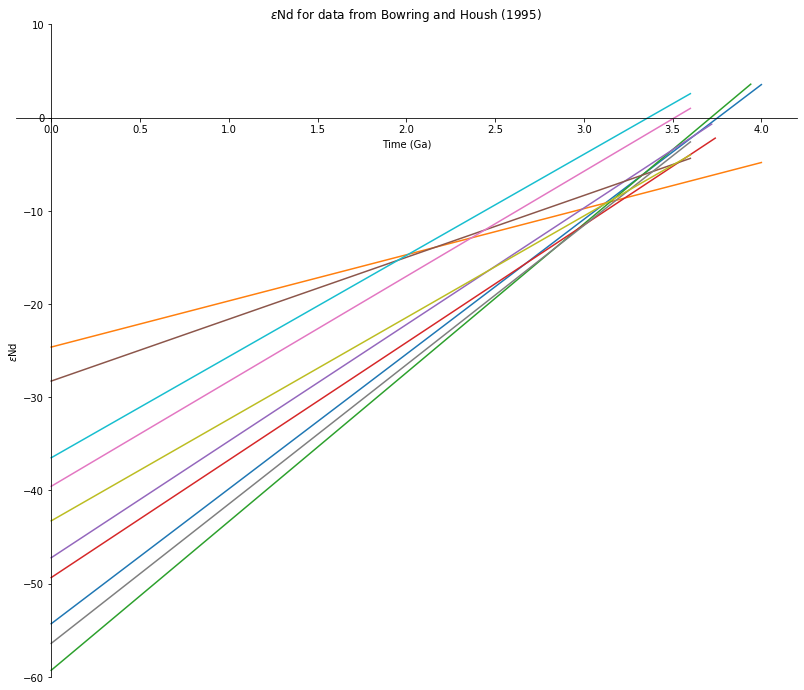

In [14]:
#copy and paste below

plt.figure(figsize = (14, 12))
plt.xlabel('Time (Ga)')
plt.ylabel('$\epsilon$Nd')
plt.ylim((-60,10))
#if we want to change the spacing of our ticks, we can also us a numpy array to do it
x_ticks = np.arange(0, 4.56, 0.5)
plt.xticks(x_ticks)

#these bits of code are needed to change where the x axis and y axis intersect each other
#the "spines" here are the two axes (bottom and left) and the bounding box (top and right)
#these bits of code also allow us to make the plot more asethetically pleasing by removing the bounding box
#the .gca() function just let's python know that we want to manipulate the figure as defined in the lines of code above

ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('$\epsilon$Nd for data from Bowring and Housh (1995)')

#plot up these data as lines, you'll need to make a separate call to plt.plot() for each line
#you can use a for loop to do this
#I've given you a hint for the syntax for the plt.plot() function, fill in the ?s

for i in range(len(BH_frame.U_Pb)):
    plt.plot([0, BH_frame.U_Pb[i]],[BH_frame.Ep_0[i], BH_frame.Ep_U_Pb[i]])
    

plt.show()

Now answer the following questions below: At about what age (or small age range) do most of the lines intersect? What sort of geologic event might this age represent? What sort of geologic scenario might lead to the case in which this age of intersection has no age significance?